**ALL DATA CAME FROM:** <br>
Morgan, Malcolm, Anable, Jillian, & Lucas, Karen. (2021). A place-based carbon calculator for England. Presented at the 29th Annual GIS Research UK Conference (GISRUK), Cardiff, Wales, UK (Online): Zenodo. http://doi.org/10.5281/zenodo.4665852

#### Imports

In [1]:
import os
import pandas as pd
from visutils import *
from utils import *

DATA_DIR = './data/'
LSOA_DIR = 'lsoa_csvs/'

zipfiles = [DATA_DIR + z for z in os.listdir(DATA_DIR) if '.zip' in z]
show_data_dir(zipfiles)

File Name                                             Modified             Size
la_averages.csv                                2021-07-07 23:07:04       330864
metadata.csv                                   2021-06-29 17:10:30        13936
oac_averages.csv                               2021-07-07 23:07:04         8757
PBCC_LSOA_data.csv                             2021-07-07 23:15:24     29643578



#### Load Data

In [2]:
extract_all_from_zip(zipfiles[0], path=DATA_DIR+LSOA_DIR)

In [3]:
sheets_to_dfs = load_sheets(DATA_DIR + 'SAPE23DR2_2020.xlsx')

/Users/chriscaballero/Desktop/Environmental/envenv/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [4]:
dfs = load_dfs(zipfiles[0])
dfs['PBCC_LSOA_data-ext'] = dfs['PBCC_LSOA_data'].rename(
    columns={
        'LSOA11': 'LSOA Code', 
        'LSOA11NM': 'LSOA Name', 
        'LAD17CD': 'LA Code (2018 boundaries)', 
        'LAD17NM': 'LA name (2018 boundaries)'
    }
)

#### Explore Data

Large file takes about a minute to load.

In [5]:
sheets_to_dfs['Mid-2020 Persons'].head()

,LSOA Code,LSOA Name,LA Code (2018 boundaries),LA name (2018 boundaries),LA Code (2021 boundaries),LA name (2021 boundaries),All Ages,0,1,2,...,81,82,83,84,85,86,87,88,89,90+
0,E01011949,Hartlepool 009A,E06000001,Hartlepool,E06000001,Hartlepool,1944,20,32,22,...,2,9,14,9,8,7,9,2,2,7
1,E01011950,Hartlepool 008A,E06000001,Hartlepool,E06000001,Hartlepool,1298,14,18,15,...,5,3,1,2,2,2,3,2,1,4
2,E01011951,Hartlepool 007A,E06000001,Hartlepool,E06000001,Hartlepool,1208,18,13,12,...,10,7,2,4,4,5,1,1,4,2
3,E01011952,Hartlepool 002A,E06000001,Hartlepool,E06000001,Hartlepool,1724,23,20,32,...,10,13,14,7,17,18,12,10,8,67
4,E01011953,Hartlepool 002B,E06000001,Hartlepool,E06000001,Hartlepool,2026,27,20,32,...,4,6,6,10,1,2,4,1,4,9


In [6]:
dfs['PBCC_LSOA_data-ext'].head()

,LSOA Code,LSOA Name,SOAC11NM,LA Code (2018 boundaries),LA name (2018 boundaries),WD18NM,gas_percap_2010,gas_percap_2011,gas_percap_2012,gas_percap_2013,...,T2W_Underground_grade,elec_emissions_grade,gas_emissions_grade,car_emissions_grade,total_emissions_grade,flights_grade,other_heating_grade,van_grade,consumption_all_kgco2e_percap,consumption_grade
0,E01011954,Hartlepool 001A,Endeavouring social renters,E06000001,Hartlepool,De Bruce,1150.0,1080.0,1100.0,1130.0,...,C,B,D,C,A,A,C,B-,1230,A+
1,E01011969,Hartlepool 001B,Ageing suburbanites,E06000001,Hartlepool,De Bruce,1420.0,1340.0,1370.0,1390.0,...,C,C+,E-,D-,C+,B,D,B,2660,B-
2,E01011970,Hartlepool 001C,Ageing suburbanites,E06000001,Hartlepool,Hart,1260.0,1180.0,1180.0,1170.0,...,C,B-,D,E-,E,E+,A-,B+,5910,E-
3,E01011971,Hartlepool 001D,Comfortable suburbia,E06000001,Hartlepool,Hart,1160.0,1090.0,1080.0,1080.0,...,C,B,D+,E,E+,E+,A,C,5060,E+
4,E01033465,Hartlepool 001F,Comfortable suburbia,E06000001,Hartlepool,Hart,1370.0,1390.0,1280.0,1290.0,...,C,C+,E+,E+,B-,B-,B,C-,2200,B+


In [7]:
cols = ['gas_percap', 'elec_percap', 'car_percap', 'van_percap']
la_df = dfs['PBCC_LSOA_data-ext'].groupby('LA name (2018 boundaries)')

avg_dfs_UK = get_avg_dfs(dfs['PBCC_LSOA_data-ext'], cols)
avg_dfs_LA = get_avg_dfs(la_df, cols, grouped=True)

#### Yearly Distribution - $\text{kg CO}_2$ per person (2010-2018)

/Users/chriscaballero/Desktop/Environmental/visutils.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


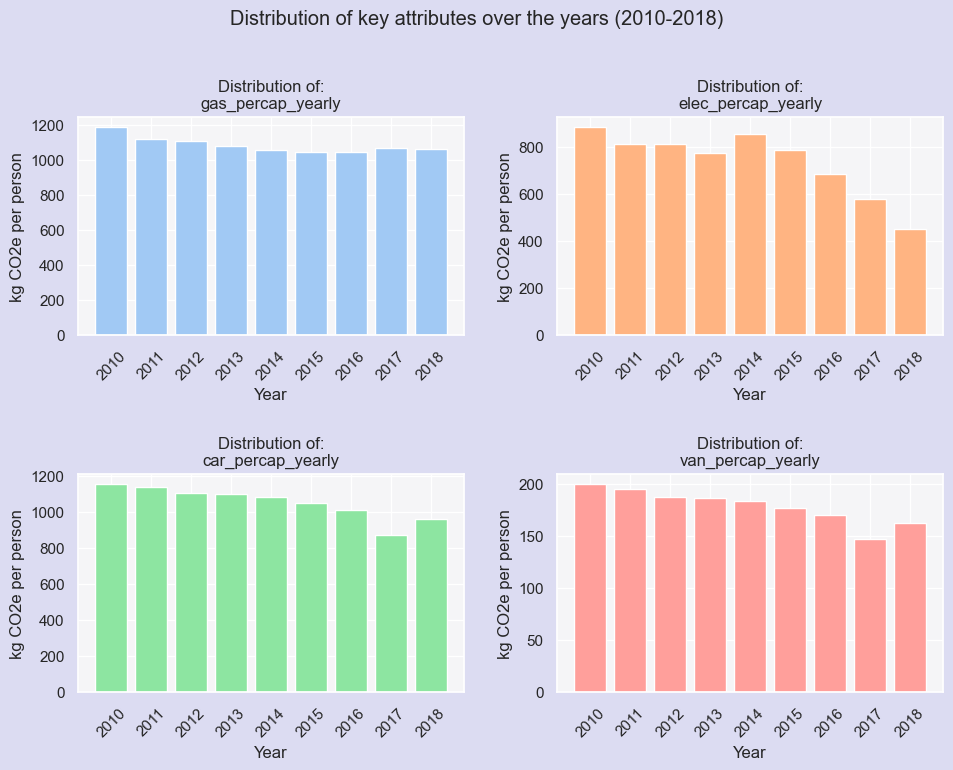

In [8]:
plot_yearly_distribution(avg_dfs_UK)

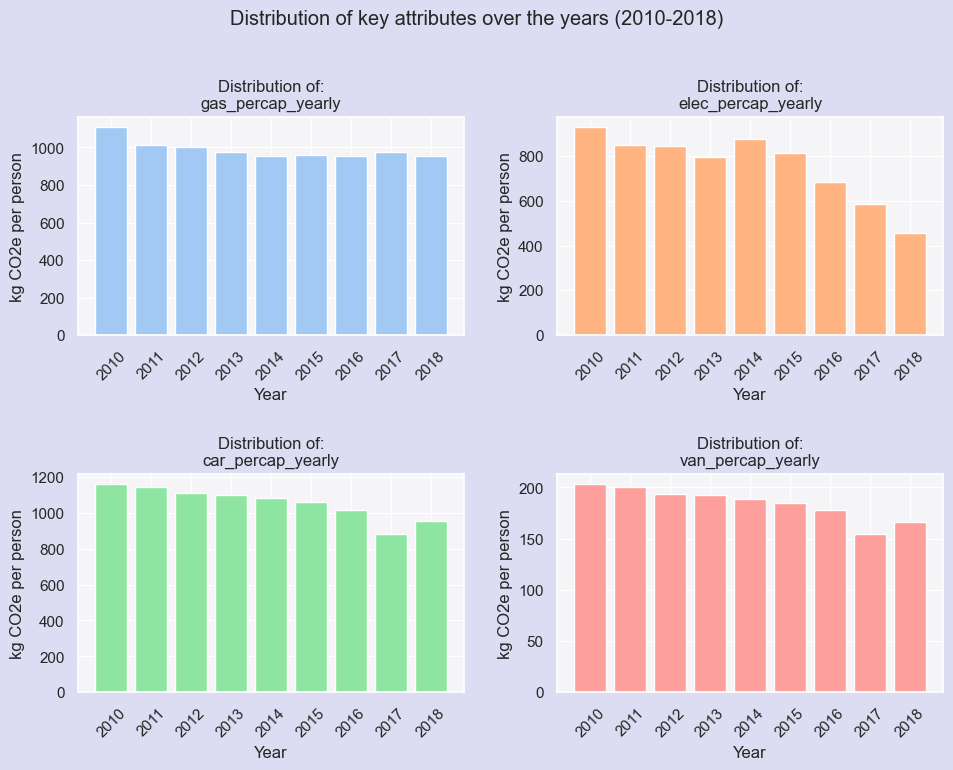

In [9]:
plot_yearly_distribution(avg_dfs_LA)

#### Local Authority and England Average $\text{kg CO}_2$ per person

In [10]:
cols = dfs['PBCC_LSOA_data-ext'].columns
kgco2e_UK_df, kgco2e_cols = get_kgco2e_df(dfs['PBCC_LSOA_data-ext'], cols)
kgco2e_LA_df, kgco2e_cols = get_kgco2e_df(la_df, cols, grouped=True)

Compares carbon emissions along several metrics in a stacked bar chart:
1. Nutrition
2. Consumables
3. Services
4. Consumption
5. Recreation
6. Other

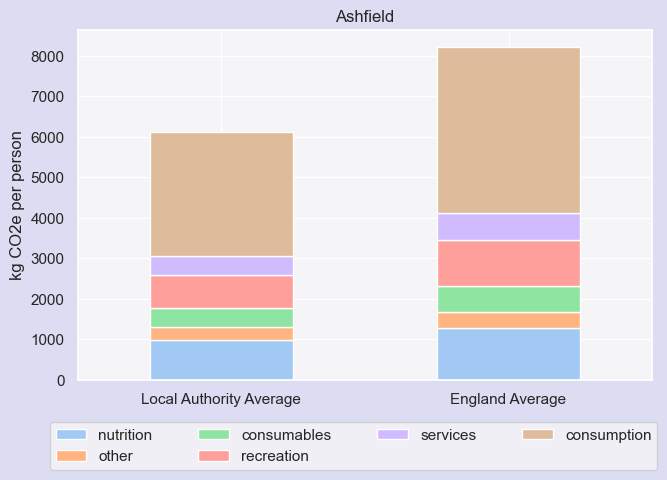

In [11]:
kgco2e_LA_df, kgco2e_cols = get_kgco2e_df(la_df, cols=la_df.sum().columns, grouped=True, idx=4)
kgco2e_df = pd.concat([kgco2e_LA_df, kgco2e_UK_df])
plot_stacked_kgco2e(kgco2e_df, kgco2e_cols, labels=['Local Authority', 'England'])

#### Working with Environmental Emission Grades

##### Selecting relevant columns

In [12]:
cols = [col for col in dfs['PBCC_LSOA_data-ext'].columns if 'grade' in col or 'epc' in col]
dataset = dfs['PBCC_LSOA_data-ext'][cols]

In [13]:
indices = []
for col in dataset.columns:
    indices.extend([i for i, x in enumerate(dataset[col]) if x == x])

indices = list(set(indices))
dataset = dataset.iloc[indices].reset_index(drop=True)

In [14]:
dataset.head()

,epc_total,epc_newbuild,epc_A,epc_B,epc_C,epc_D,epc_E,epc_F,epc_G,epc_score_avg,...,T2W_Foot_grade,T2W_Underground_grade,elec_emissions_grade,gas_emissions_grade,car_emissions_grade,total_emissions_grade,flights_grade,other_heating_grade,van_grade,consumption_grade
0,615,138,0,53,178,333,46,5,0,66.1,...,B-,C,B,D,C,A,A,C,B-,A+
1,266,32,0,10,73,147,32,4,0,64.0,...,E-,C,C+,E-,D-,C+,B,D,B,B-
2,191,13,0,9,57,105,16,4,0,65.2,...,F,C,B-,D,E-,E,E+,A-,B+,E-
3,242,21,2,11,82,137,9,1,0,67.0,...,F+,C,B,D+,E,E+,E+,A,C,E+
4,500,186,1,87,323,76,12,1,0,74.6,...,F+,C,C+,E+,E+,B-,B-,B,C-,B+


##### Get Grades Columns

It is important the grades are converted to integer values for future training and correlation matrix visualization.

In [15]:
def map_grades(gradevalues, grades):
    label = 0
    for i in range(len(grades)):
        if i % 3 == 0 and i > 0:
            label += 1
            gradevalues[grades[i]] = int(label)
        else:
            gradevalues[grades[i]] = int(label)
            
    return gradevalues

grade_cols = [col for col in dataset.columns if 'grade' in col]
grades = 'A+ A A- B+ B B- C+ C C- D+ D D- E+ E E- F+ F F-'.split()
grades.reverse()
gradevalues = map_grades({}, grades)

In [16]:
grades_df = dataset[grade_cols]
for col in grades_df.columns:
    grades_df.loc[:, col] = grades_df[col].map(gradevalues)

grades_df.head()

,cars_percap_grade,km_percap_grade,T2W_Car_grade,T2W_Cycle_grade,T2W_Bus_grade,T2W_Train_grade,T2W_Foot_grade,T2W_Underground_grade,elec_emissions_grade,gas_emissions_grade,car_emissions_grade,total_emissions_grade,flights_grade,other_heating_grade,van_grade,consumption_grade
0,3.0,2,1,3,4,1,4,3,4.0,2.0,3.0,5.0,5,3,4.0,5
1,2.0,2,2,1,3,1,1,3,3.0,1.0,2.0,3.0,4,2,4.0,4
2,1.0,2,2,0,2,2,0,3,4.0,2.0,1.0,1.0,1,5,4.0,1
3,1.0,1,0,0,1,2,0,3,4.0,2.0,1.0,1.0,1,5,3.0,1
4,1.0,0,0,1,2,2,0,3,3.0,1.0,1.0,4.0,4,4,3.0,4


##### Get EPC Columns

In [17]:
epc_cols = [col for col in dataset.columns if 'epc' in col]
epc_df = dataset.loc[:, dataset.columns.isin(epc_cols)]
epc_df.head()

,epc_total,epc_newbuild,epc_A,epc_B,epc_C,epc_D,epc_E,epc_F,epc_G,epc_score_avg
0,615,138,0,53,178,333,46,5,0,66.1
1,266,32,0,10,73,147,32,4,0,64.0
2,191,13,0,9,57,105,16,4,0,65.2
3,242,21,2,11,82,137,9,1,0,67.0
4,500,186,1,87,323,76,12,1,0,74.6


##### Combine EPC and Grades into a numeric and categorical feature table

In [18]:
numeric_df = pd.concat([epc_df, grades_df], axis=1)
numeric_df.head()

,epc_total,epc_newbuild,epc_A,epc_B,epc_C,epc_D,epc_E,epc_F,epc_G,epc_score_avg,...,T2W_Foot_grade,T2W_Underground_grade,elec_emissions_grade,gas_emissions_grade,car_emissions_grade,total_emissions_grade,flights_grade,other_heating_grade,van_grade,consumption_grade
0,615,138,0,53,178,333,46,5,0,66.1,...,4,3,4.0,2.0,3.0,5.0,5,3,4.0,5
1,266,32,0,10,73,147,32,4,0,64.0,...,1,3,3.0,1.0,2.0,3.0,4,2,4.0,4
2,191,13,0,9,57,105,16,4,0,65.2,...,0,3,4.0,2.0,1.0,1.0,1,5,4.0,1
3,242,21,2,11,82,137,9,1,0,67.0,...,0,3,4.0,2.0,1.0,1.0,1,5,3.0,1
4,500,186,1,87,323,76,12,1,0,74.6,...,0,3,3.0,1.0,1.0,4.0,4,4,3.0,4


#### Correlation Matrices for Emission Grades

Correlation Matrices for Some Numeric Attributes
- These attributes are related to emission grading, which is relevant for predicting how good or bad the emissions for a zone are.
- Energy Performance Certificates (EPCs) are scores captured when homes are bought and sold.
- The emission grades are straight forward, simply grading the emission quantity based on some heuristics.

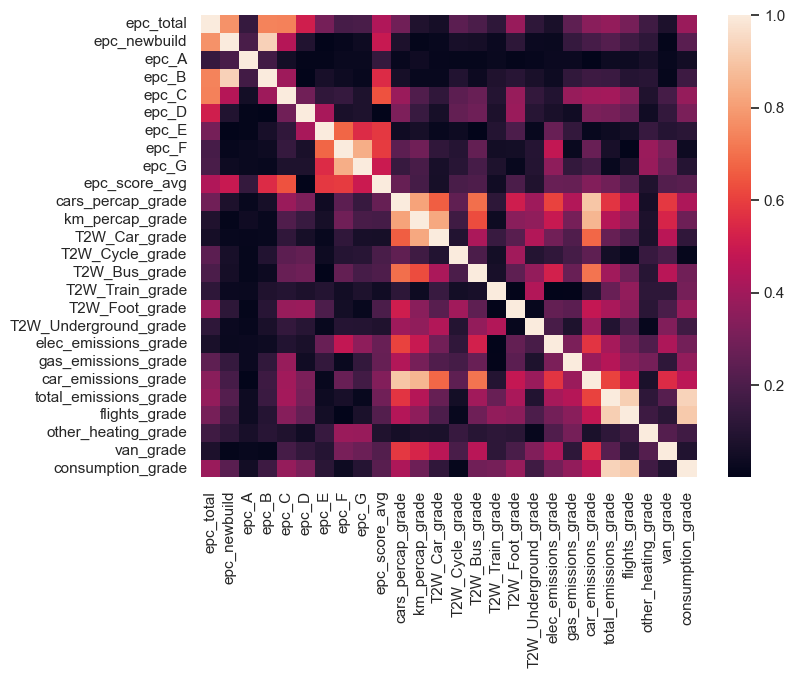

In [19]:
sns.set_style('white')
plt.figure(figsize=(8, 6))
sns.heatmap(abs(numeric_df.corr()))
plt.show()

Correlation of the EPC columns

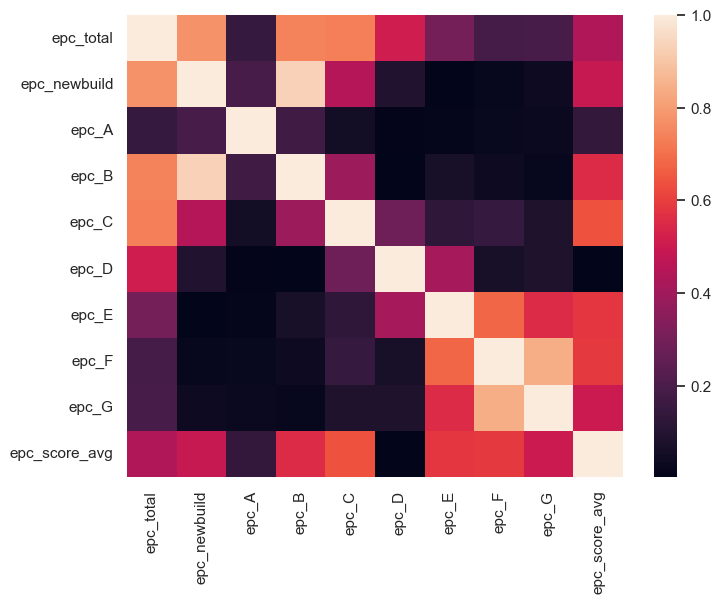

In [20]:
sns.set_style('white')
plt.figure(figsize=(8, 6))
sns.heatmap(abs(epc_df.corr()))
plt.show()

Correlation for the emission grade columns

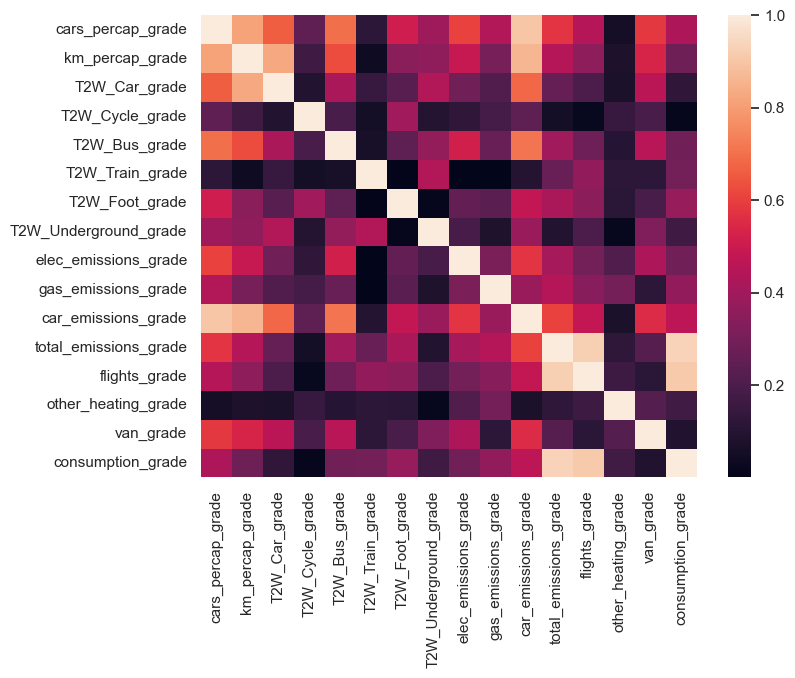

In [21]:
sns.set_style('white')
plt.figure(figsize=(8, 6))
sns.heatmap(abs(grades_df.corr()))
plt.show()

#### Imputing Missing Values in the Emission Grades Columns

In [23]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error, max_error

def missing_vals(dataset, summary=True): 
    bad_indices = []
    for col in dataset.columns:
        bad_indices.extend([i for i, x in enumerate(dataset[col]) if x != x])

    bad_indices = list(set(bad_indices))
    if summary:
        print('Number of null entires:', len(bad_indices))

    return bad_indices

data = dfs['PBCC_LSOA_data-ext'][grade_cols]
grades = pd.DataFrame({col: data[col].map(gradevalues) for col in grade_cols})
bad_indices = missing_vals(grades)

x_clean = grades[~grades.index.isin(bad_indices)]
x_missing = grades.copy()

print('The length of the array WITH missing values:', len(x_missing))
print('The length of the array WITHOUT missing values:', len(x_clean))

imputer = IterativeImputer(max_iter=10, random_state=42)
x_recovered = imputer.fit_transform(x_missing)

recovered_grades = pd.DataFrame(x_recovered, columns = grades.columns)

print('The length of the array WITH RECOVERED values:', len(recovered_grades))
missing_vals(recovered_grades);

Number of null entires: 924
The length of the array WITH missing values: 32844
The length of the array WITHOUT missing values: 31920
The length of the array WITH RECOVERED values: 32844
Number of null entires: 0


In [24]:
recovered_grades = recovered_grades.astype(int)
recovered_grades.head()

,cars_percap_grade,km_percap_grade,T2W_Car_grade,T2W_Cycle_grade,T2W_Bus_grade,T2W_Train_grade,T2W_Foot_grade,T2W_Underground_grade,elec_emissions_grade,gas_emissions_grade,car_emissions_grade,total_emissions_grade,flights_grade,other_heating_grade,van_grade,consumption_grade
0,3,2,1,3,4,1,4,3,4,2,3,5,5,3,4,5
1,2,2,2,1,3,1,1,3,3,1,2,3,4,2,4,4
2,1,2,2,0,2,2,0,3,4,2,1,1,1,5,4,1
3,1,1,0,0,1,2,0,3,4,2,1,1,1,5,3,1
4,1,0,0,1,2,2,0,3,3,1,1,4,4,4,3,4


#### Testing Classification Techniques for Predicting Grades

Can be used to impute missing values if performance is better than sklearn imputation.

In [25]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def score_models_on_dataframe(data):
    x = data.drop('gas_emissions_grade', axis=1)
    y = data['gas_emissions_grade']
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    
    print('SVC Multi-class (one-versus-one)')
    print('Starting training...')

    svc = SVC(decision_function_shape='ovo')
    svc.fit(X_train, y_train)
    train_score = svc.score(X_train, y_train)
    test_score = svc.score(X_test, y_test)
    
    print(f'Train Score: {train_score}\nTest Score: {test_score}')

    print('\nRANDOM FOREST Classifier')
    print('Starting training...')

    clf = RandomForestClassifier(max_depth=2)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    print(f'Train Score: {train_score}\nTest Score: {test_score}')
    
 
    print('\nKNN Classifier')
    print('Starting training...')

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    print(f'Train Score: {train_score}\nTest Score: {test_score}')

##### Random Undersampling for better Training Accuracy

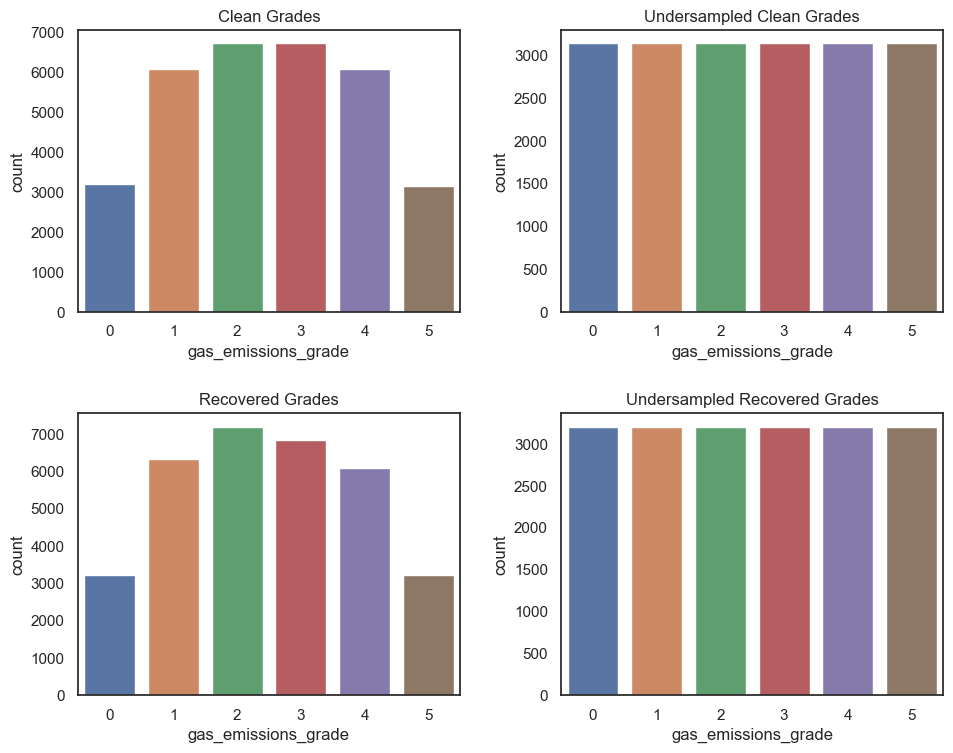

In [26]:
from sklearn.utils import resample

x_clean = x_clean.astype(int)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

undersample_clean = x_clean.groupby('gas_emissions_grade').apply(lambda x: resample(x, replace=False, n_samples=x_clean['gas_emissions_grade'].value_counts().min()))

sns.countplot(data=x_clean, x='gas_emissions_grade', ax=axs[0][0])
axs[0][0].set_title('Clean Grades')
sns.countplot(data=undersample_clean, x='gas_emissions_grade', ax=axs[0][1])
axs[0][1].set_title('Undersampled Clean Grades')

undersample_recovered = recovered_grades.groupby('gas_emissions_grade').apply(lambda x: resample(x, replace=False, n_samples=recovered_grades['gas_emissions_grade'].value_counts().min()))

sns.countplot(data=recovered_grades, x='gas_emissions_grade', ax=axs[1][0])
axs[1][0].set_title('Recovered Grades')
sns.countplot(data=undersample_recovered, x='gas_emissions_grade', ax=axs[1][1])
axs[1][1].set_title('Undersampled Recovered Grades')
plt.tight_layout(pad=2)
plt.show()

##### Model Training and Evaluation

Scoring done with the grades dataframe with imputed values.

In [27]:
score_models_on_dataframe(undersample_recovered.iloc[:10000])

SVC Multi-class (one-versus-one)
Starting training...
Train Score: 0.6297142857142857
Test Score: 0.604

RANDOM FOREST Classifier
Starting training...
Train Score: 0.489
Test Score: 0.49733333333333335

KNN Classifier
Starting training...
Train Score: 0.7245714285714285
Test Score: 0.5026666666666667


Scoring done with the grades dataframe with removed 'nan' values.

In [28]:
score_models_on_dataframe(undersample_clean.iloc[:10000])

SVC Multi-class (one-versus-one)
Starting training...
Train Score: 0.6201428571428571
Test Score: 0.5863333333333334

RANDOM FOREST Classifier
Starting training...
Train Score: 0.5001428571428571
Test Score: 0.518

KNN Classifier
Starting training...
Train Score: 0.7042857142857143
Test Score: 0.49
